Enes Bilgin
ID:504191512

In [10]:
# Enes Bilgin
# ID:504191512
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
import enum 
from __future__ import division
from sklearn.model_selection import KFold
from random import randint

#Reading all dataframes
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

tf1 = pd.read_csv("test1.csv") 
tf2 = pd.read_csv("test2.csv") 


In [11]:
#By printing a dataframe, you can view the data in csv format
print("      Dataframes\n")
print(df1.head(5))
print(df2.head(5))
#By printing a testframe, you can view the data in csv format
print("\n        Testframes\n")
print(tf1.head(5))
print(tf2.head(5))

      Dataframes

         x1        x2  y
0 -0.260234  2.767817  0
1  3.466190  6.054691  1
2 -2.036224  4.491902  0
3  2.434426  6.638656  1
4 -0.541338  3.210246  0
         x1        x2  y
0 -0.321883 -0.399495  0
1 -1.188954 -4.457593  0
2  2.852158  1.696284  1
3  2.788976  4.119233  1
4  0.507563 -1.118629  0

        Testframes

         x1        x2  y
0 -0.669476  2.878985  0
1 -0.269832  4.914304  0
2 -1.190915  2.621502  0
3 -2.519063  7.181744  0
4  0.242555  1.992505  0
         x1        x2  y
0  1.525892  2.168866  1
1  2.246059  5.139379  1
2  2.509428  5.311178  1
3  2.458182  2.648674  1
4  2.921835  0.475737  1


In [12]:
#Returns data and labels of given "classLabel" from dataframe
def GetDataAndLabels(classLabel, dataframe):
    classdt = dataframe
    if classLabel != None:
        classdt = dataframe[dataframe['y'] == classLabel]   
    data = classdt[['x1','x2']].values
    labels = classdt['y'].values
    return [data, labels]

#Returns feature of given "classLabel" and "featureName" from dataframe
def GetFeature(classLabel, dataframe, featureName):
    classdt = dataframe[dataframe['y'] == classLabel]
    feature = classdt[featureName].values
    return feature


## Part A: Examine training sets

### Dataset -1 

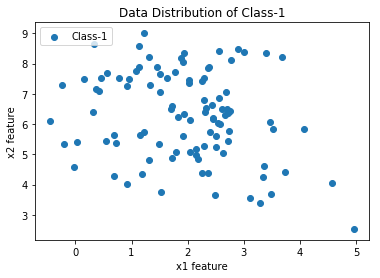

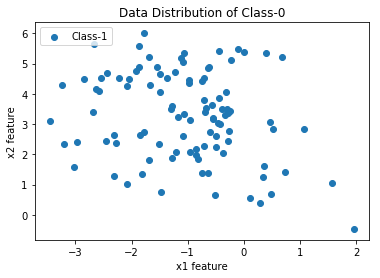

In [13]:
dt1_c1_x1 = GetFeature(1, df1, 'x1')
dt1_c1_x2 = GetFeature(1, df1, 'x2')

dt1_c0_x1 = GetFeature(0, df1, 'x1')
dt1_c0_x2 = GetFeature(0, df1, 'x2')

def DrawScatterPlot(x1, x2, className):
    plt.scatter(x1, x2,label="Class-1")
    plt.xlabel("x1 feature")
    plt.ylabel("x2 feature")
    plt.legend(loc='upper left')
    plt.title('Data Distribution of ' + className )
    plt.show()


DrawScatterPlot(dt1_c1_x1, dt1_c1_x2, "Class-1")

DrawScatterPlot(dt1_c0_x1, dt1_c0_x2, "Class-0")

### Dataset - 2

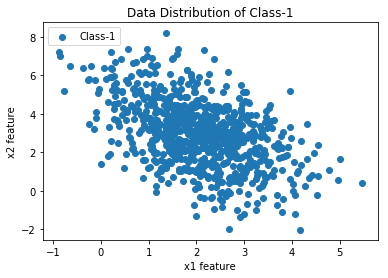

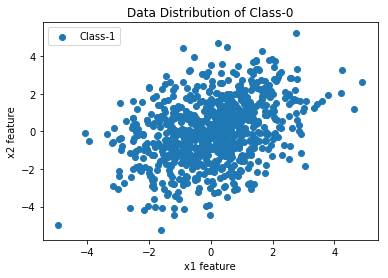

In [14]:
dt2_c1_x1 = GetFeature(1, df2, 'x1')
dt2_c1_x2 = GetFeature(1, df2, 'x2')

dt2_c0_x1 = GetFeature(0, df2, 'x1')
dt2_c0_x2 = GetFeature(0, df2, 'x2')

DrawScatterPlot(dt2_c1_x1, dt2_c1_x2, "Class-1")

DrawScatterPlot(dt2_c0_x1, dt2_c0_x2, "Class-0")

### Covariance of Dataset -1

Covariance Matrix of Class 1
[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]


Covariance Matrix of Class 0
[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]


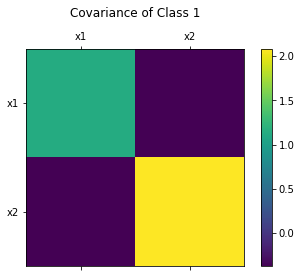

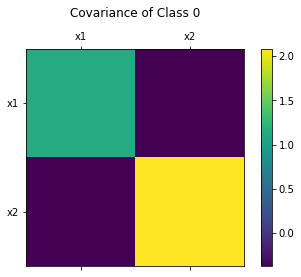

In [15]:
def Covariance(data):
    column_count = np.size(data,1)
    sample_count = np.size(data,0)
    cov_mat = np.empty([column_count, column_count])
    
    means = data.mean(axis=0)
    variances = data.var(axis=0)
   
    for i in range(column_count):
        for k in range(column_count):
            if(i==k):
                cov_mat[i][k] = variances[i]
            else:
                corr = 0
                for j in range(sample_count):
                    corr += (data[j][i]-means[i])*(data[j][k]-means[k])
                corr = corr / sample_count
                cov_mat[i][k] = corr
                
    return cov_mat

def Covariance2(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance


[dt1_c1, dt1_c1_label] = GetDataAndLabels(1, df1)
[dt1_c0, dt1_c0_label] = GetDataAndLabels(0, df1)


#print(dt1_c1)
dt1_c1_cov_matx = Covariance(dt1_c1)
dt1_c0_cov_matx = Covariance(dt1_c0)


print("Covariance Matrix of Class 1")
print(dt1_c1_cov_matx)
print("\n")
print("Covariance Matrix of Class 0")
print(dt1_c0_cov_matx)


def DrawCovarinceGraph(matrix, className):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Covariance of '+ className + '\n')
    cax = ax.matshow(matrix,interpolation='nearest') #cov. matrix of dataset2
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)

    
DrawCovarinceGraph(dt1_c1_cov_matx, "Class 1")    

DrawCovarinceGraph(dt1_c0_cov_matx, "Class 0") 

### Covariance of Dataset - 2  

Covariance Matrix of Class 0
[[1.91970895 0.85690451]
 [0.85690451 2.83579458]]


Covariance Matrix of Class 1
[[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]


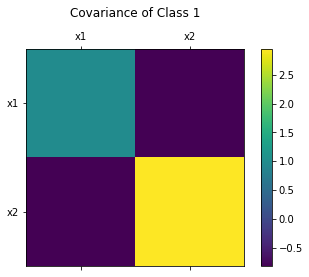

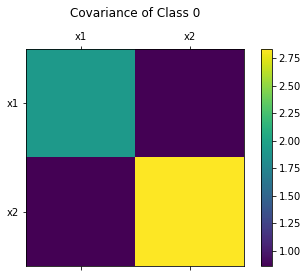

In [16]:
[dt2_c1, dt2_c1_label] = GetDataAndLabels(1, df2)
[dt2_c0, dt2_c0_label] = GetDataAndLabels(0, df2)

dt2_c1_cov_matx = Covariance(dt2_c1)
dt2_c0_cov_matx = Covariance(dt2_c0)

print("Covariance Matrix of Class 0")
print(dt2_c0_cov_matx)
print("\n")
print("Covariance Matrix of Class 1")
print(dt2_c1_cov_matx)

    
DrawCovarinceGraph(dt2_c1_cov_matx, "Class 1")    

DrawCovarinceGraph(dt2_c0_cov_matx, "Class 0") 

### Histogram of Dataset - 1

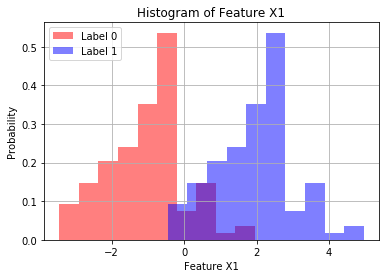

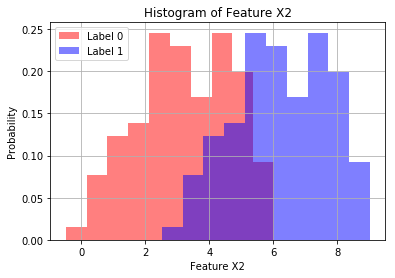

In [17]:
def DrawHistogramOfDataset(c0_feature,c1_feature, featureName):
    plt.hist(c0_feature, density=True, facecolor='r', alpha=0.5, label="Label 0")
    plt.hist(c1_feature, density=True, facecolor='b', alpha=0.5, label="Label 1")
    plt.legend(loc='upper left')
    plt.xlabel(featureName)
    plt.ylabel('Probability')
    plt.title('Histogram of ' + featureName)
    plt.grid(True)
    plt.show()
    
    
DrawHistogramOfDataset(dt1_c0_x1, dt1_c1_x1, 'Feature X1')  

DrawHistogramOfDataset(dt1_c0_x2, dt1_c1_x2, 'Feature X2')  

### Histogram of Dataset - 2 

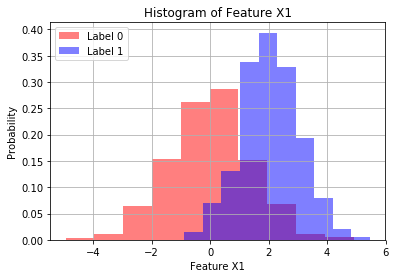

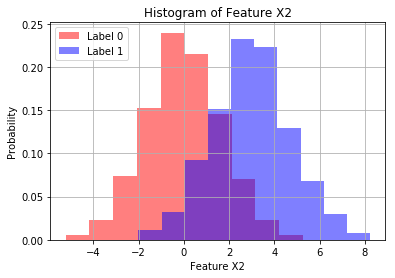

In [18]:
DrawHistogramOfDataset(dt2_c0_x1, dt2_c1_x1, 'Feature X1')  

DrawHistogramOfDataset(dt2_c0_x2, dt2_c1_x2, 'Feature X2')  

## Part B: Implement Naive Bayes Classifier

In [30]:
#Implement PART B:

class COV_TYPE(enum.Enum): 
    EQUAL = 1
    DIAGNOL_ARBITRARY = 2
    ARBITRARY = 3

def hasConstanVariances(data_c1, data_c0):
    c1_cov_matx = Covariance(data_c1)
    c0_cov_matx = Covariance(data_c0)
    
    var_c0 = data_c0.var(axis=0)
    var_c1 = data_c1.var(axis=0)
    
    c1_fake = var_c1[0] * (np.identity(2))
    c0_fake = var_c0[0] * (np.identity(2))
    
    c1_cmp = (c1_fake == c1_cov_matx)
    c1_equals = c1_cmp.all()
    c0_cmp = (c0_fake == c0_cov_matx)
    c0_equals = c0_cmp.all()
    
    return (c1_equals and c0_equals)

#Take the inverse of matrix even if it is not invertible :D (only for 2x2 matrices)
def Inverser(matrix):
    det = 1 /( (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0]) )
    if det == 0.0:
        print("Invertible Matrix Uses Psuedo Inverse Method")
        return (Inverser((matrix.T).dot(matrix))).dot(matrix.T)
    else:
        a = np.ones([2 ,2]) 
        a[0][0] = matrix[1][1]
        a[0][1] = -matrix[1][0]
        a[1][0] = -matrix[0][1]
        a[1][1] = matrix[0][0]
    
        a = det * a
        return a
    
def getDiscriminantFunction(data, cov, propOfClass, case):
    p_ci = propOfClass
    mean = data.mean(axis = 0)   
    inverse_cov = Inverser(cov)
    if case == COV_TYPE.EQUAL:
        def gi(x):
            a = (( mean.dot(inverse_cov)).dot((x.T)))
            b = (( mean.dot(inverse_cov)).dot((mean.T)))
            return (a + ( np.log(p_ci) + (-0.5) * b ) )
        return gi          
    elif case == COV_TYPE.DIAGNOL_ARBITRARY:
        variance = data.var(axis=0)
        def gi(x):
            return ( ((-0.5 * (1 / variance[0])) * (( x - mean).dot((x - mean).T)))
                        + np.log(p_ci) )
        return gi
    else:  
        def gi(x):
            center = x - mean
            first = center.dot(inverse_cov)
            a = (-0.5) * (first.dot(center.T))
            return (a + np.log(p_ci) + ((-0.5)* np.log(np.linalg.det(cov))) )
        return gi

def TestAndCompare(g1x,g0x,test_sample,test_label):
    g1result = g1x(test_sample)
    g0result = g0x(test_sample)
    
    if (g1result >= g0result):
        if (test_label == 1):
            return 1
        else: 
            return 0
    else:
         if (test_label == 0):
            return 1
         else:
            return 0

def TrainAndTestWithBayesClassfier(data_c1, data_c0, 
                                   test_data_c1, test_c1_label, 
                                   test_data_c0, test_c0_label):
    
    
    c1_cov_matx = Covariance(data_c1)
    c0_cov_matx = Covariance(data_c0)
    
    #print("Cov Matrix of Class 1:\n" + str(c1_cov_matx))
    #print("\n")
    #print("Cov Matrix of Class 0:\n" + str(c0_cov_matx))
    #print("\n")
    
    pc1 = data_c1.shape[0] / (data_c1.shape[0] + data_c0.shape[0] )
    pc0 = 1 - pc1
    
    matrices_cmp = ( c1_cov_matx == c0_cov_matx)
    matrices_equals = matrices_cmp.all()
    means_cmp = ( (data_c1.mean(axis=0)) == (data_c0.mean(axis=0)) )
    means_same = means_cmp.all()

    constantVariances = hasConstanVariances(data_c1,data_c0)
    
    g1x = None
    g0x = None
    if not means_same and matrices_equals:
        #print("COV_TYPE.EQUAL")
        g1x = getDiscriminantFunction(data_c1, c1_cov_matx, pc1, COV_TYPE.EQUAL)
        g0x = getDiscriminantFunction(data_c0, c0_cov_matx, pc0, COV_TYPE.EQUAL)
        
    elif constantVariances == 1:
        #print("COV_TYPE.DIAGNOL_ARBITRARY")
        g1x = getDiscriminantFunction(data_c1, c1_cov_matx, pc1, COV_TYPE.DIAGNOL_ARBITRARY)
        g0x = getDiscriminantFunction(data_c0, c0_cov_matx, pc0, COV_TYPE.DIAGNOL_ARBITRARY)
    else:
        #print("COV_TYPE.ARBITRARY")
        g1x = getDiscriminantFunction(data_c1, c1_cov_matx, pc1, COV_TYPE.ARBITRARY)
        g0x = getDiscriminantFunction(data_c0, c0_cov_matx, pc0, COV_TYPE.ARBITRARY) 
    
    mis_classification = 0
    for i in range(test_data_c1.shape[0]):
        predict = TestAndCompare(g1x,g0x,test_data_c1[i],test_c1_label[i])
        if predict == 0:
             mis_classification =  mis_classification +1
    
    for i in range(test_data_c0.shape[0]):
        predict = TestAndCompare(g1x,g0x,test_data_c0[i],test_c0_label[i])
        if predict == 0:
            mis_classification =  mis_classification +1
            
    e = (mis_classification / (test_data_c0.shape[0] + test_data_c1.shape[0]))*100
    return e


[tf1_data_c1, tf1_c1_label] = GetDataAndLabels(1, tf1)
[tf1_data_c0, tf1_c0_label] = GetDataAndLabels(0, tf1)

print("***** Bayes Classifier on Dataset-1 *******************")
result = TrainAndTestWithBayesClassfier(dt1_c1,dt1_c0, tf1_data_c1, tf1_c1_label, tf1_data_c0, tf1_c0_label)
print("Classification error rate of TestFrame-1 : " + str(result))

[tf2_data_c1, tf2_c1_label] = GetDataAndLabels(1, tf2)
[tf2_data_c0, tf2_c0_label] = GetDataAndLabels(0, tf2)

print("\n***** Bayes Classifier on Dataset-1 *******************")
result2 = TrainAndTestWithBayesClassfier(dt2_c1,dt2_c0, tf2_data_c1, tf2_c1_label, tf2_data_c0, tf2_c0_label)
print("Classification error rate of TestFrame-2 : " + str(result2))

***** Bayes Classifier on Dataset-1 *******************
Classification error rate of TestFrame-1 : 2.0

***** Bayes Classifier on Dataset-1 *******************
Classification error rate of TestFrame-2 : 11.5


## Part C: Implement K-Fold Cross Validation

In [21]:
#Implement PART C:
#We merge datasets with their testsets
df1_concat = pd.concat([df1,tf1])
df2_concat = pd.concat([df2,tf2])

def getDataLabelsOfClass(classLabel, data, labels):
    indices = np.where(labels == classLabel)[0]
    
    X = data[indices]
    Y = labels[indices]
    
    return [X, Y]


def TrainAndTestWithKFold(dataFrame): 
    
    [X, Y] = GetDataAndLabels(None,dataFrame)
    average = 0  
    random.seed(1)
    
    CVModel = KFold(n_splits=5, shuffle=True, random_state=randint(0,100000))
    for train_index, test_index in CVModel.split(Y):
        #print("%s %s" % (train_index.size, test_index.size))
        train_data = X[train_index]
        train_labels = Y[train_index]

        test_data = X[test_index]
        test_labels = Y[test_index]
        
        
        [dX_c0, dY_c0] = getDataLabelsOfClass(0,train_data,train_labels)
        [dX_c1, dY_c1] = getDataLabelsOfClass(1,train_data,train_labels)
        
        [tX_c0, tY_c0] = getDataLabelsOfClass(0,test_data,test_labels)
        [tX_c1, tY_c1] = getDataLabelsOfClass(1,test_data,test_labels)
        
        
        error_rate = TrainAndTestWithBayesClassfier(dX_c1, dX_c0, 
                                                    tX_c1, tY_c1, 
                                                    tX_c0, tY_c0)
        
        average = error_rate + average
        #print("error_rate:" + str(error_rate))
        
    average = average / 5
    
    return average

print("***** Bayes Classfier with K-Fold on Merged Dataset-1 **************")
accuracy = TrainAndTestWithKFold(df1_concat)
print("Average of Error Rate: " + str(accuracy))

print("\n******* Bayes Classfier with K-Fold on Merged Dataset-2 **************")
accuracy = TrainAndTestWithKFold(df2_concat)
print("Average of Error Rate: " + str(accuracy))

***** Bayes Classfier with K-Fold on Merged Dataset-1 **************
Average of Error Rate: 3.33333333333

******* Bayes Classfier with K-Fold on Merged Dataset-2 **************
Average of Error Rate: 10.35


Results of Dataset-1 and Dataset-2 which are given below show that error rate of a model could be deceptive since it could had been trained with non-equal distribution of classes on training dataset. For this reason, using K-fold with random distrubiton would give better approach for the model.

------Bayes Classifier on Dataset-1 -----
Classification error rate of Test frame 1: 2.0

------Bayes Classifier on Dataset-1 ------
Classification error rate of Test frame 2: 11.5

------Bayes Classfier with K-Fold on Merged Dataset-1 -------------
Average of Error Rate: 3.33333333333

-----Bayes Classfier with K-Fold on Merged Dataset-2 -----------
Average of Error Rate: 10.35


## Part D: Redo the experiments on modified Dataset 2

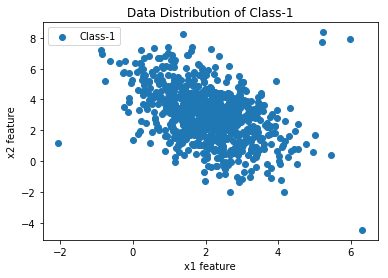

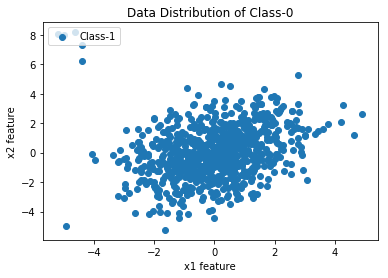

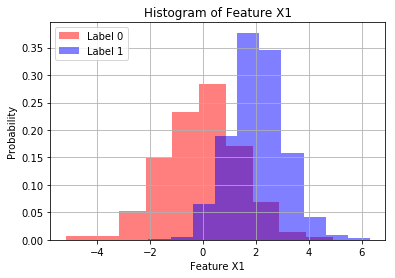

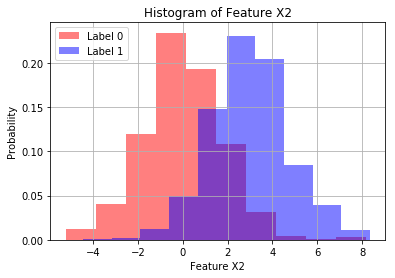

Size1 : (805, 2)
Size0 : (805, 2)
Dataset -2M Mean of Class 1
[2.06659396 2.98488729]
Dataset -2M Mean of Class 0
[-0.02684779  0.02722913]
Covariance of Class 1
[[ 1.07756488 -0.77916391]
 [-0.77916391  3.09420853]]


Covariance of Class 1
[[2.04588459 0.63042127]
 [0.63042127 3.17419239]]


In [32]:
#Implement Part D:

[dtm2_c1, dtm2_c1_label] = GetDataAndLabels(1, df2m)
[dtm2_c0, dtm2_c0_label] = GetDataAndLabels(0, df2m)

dtm2_c1_x1 = GetFeature(1, df2m, 'x1')
dtm2_c1_x2 = GetFeature(1, df2m, 'x2')

dtm2_c0_x1 = GetFeature(0, df2m, 'x1')
dtm2_c0_x2 = GetFeature(0, df2m, 'x2')

DrawScatterPlot(dtm2_c1_x1, dtm2_c1_x2, "Class-1")

DrawScatterPlot(dtm2_c0_x1, dtm2_c0_x2, "Class-0")

DrawHistogramOfDataset(dtm2_c0_x1, dtm2_c1_x1, 'Feature X1')   

DrawHistogramOfDataset(dtm2_c0_x2, dtm2_c1_x2, 'Feature X2') 

dtm2_cov_class1 = Covariance2(dtm2_c1)
dtm2_cov_class0 = Covariance2(dtm2_c0)

print("Dataset -2M Mean of Class 1\n" + str(dtm2_c1.mean(axis=0)))
#print("Dataset -2 Mean of Class 1\n" + str(dt2_c1.mean(axis=0)))

print("Dataset -2M Mean of Class 0\n" + str(dtm2_c0.mean(axis=0)))
#print("Dataset -2 Mean of Class 0\n" + str(dt2_c0.mean(axis=0)))

print("Covariance of Class 1")
print(dtm2_cov_class1)
print("\n")
print("Covariance of Class 1")
print(dtm2_cov_class0)

We can see that variances of features on modified dataset-2 are less than Dataset-2

In [31]:
print("\n***** Bayes Classifier on Dataset-2 Modified *******************")
result3 = TrainAndTestWithBayesClassfier(dtm2_c1,dtm2_c0, tf2_data_c1, tf2_c1_label, tf2_data_c0, tf2_c0_label)
print("Classification error rate of TestFrame-2 : " + str(result3))


***** Bayes Classifier on Dataset-2 Modified *******************
Classification error rate of TestFrame-2 : 12.25


Error rate of modified dataset is increased with same testset according to Dataset-2.As result of having smaller variances on features effects classifier in bad direction. (We considered means of both dataset are nearly equal and only diffence between them are variances). 